# Latihan Praktikum

## Load Dataset dari Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Praktikum AI')
!pwd

/content/drive/My Drive/Colab Notebooks/Praktikum AI


## Membuat Model Learning dengan CNN

### Membuat fungsi normalisasi data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke folder output_dataset
train_dir = 'cat_and_dog/train'
test_dir = 'cat_and_dog/test'

#buat ImageDataGenerator untuk augmentasi data latih dan normalisasi data uji
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalisasi pixel
    rotation_range=20,      # Augmentasi rotasi
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip horizontal
)

test_datagen = ImageDataGenerator(rescale=1./255)   # hanya normalisasi

### Melakukan normalisasi data

In [ ]:
# Load gambar dari folder
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Semua gambar diubah ukurannya
    batch_size=32,
    class_mode='binary'       # binary karena hanya 2 kelas: Cat dan Dog
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### Membuat model CNN

In [ ]:
from tensorflow.keras import models, layers # Import models and layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # Changed input_shape to (150, 150, 3)
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # sigmoid untuk klasifikasi binary
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Mengkompilasi Model

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

### Melakukan pelatihan model

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 637ms/step - accuracy: 0.4745 - loss: 1.9295 - val_accuracy: 0.5000 - val_loss: 0.7628
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 377ms/step - accuracy: 0.5483 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.4995 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step - accuracy: 0.5339 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.5163 - loss: 0.6875 - val_accuracy: 0.6000 - val_loss: 0.6914
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 308ms/step - accuracy: 0.6891 - loss: 0.6807 - val_accuracy: 0.6000 - val_loss: 0.6855
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.7026 - loss: 0.6549 - val_accuracy: 0.6000 - val_loss: 0.6743
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.6211 - loss: 0.6420 - val_accuracy: 0.5250 - val_loss:

### Menampilkan Curva Learning

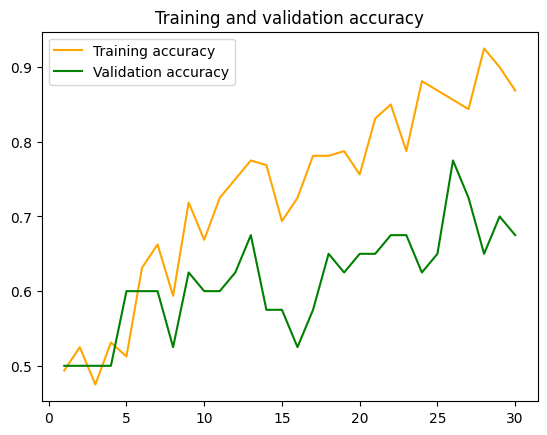

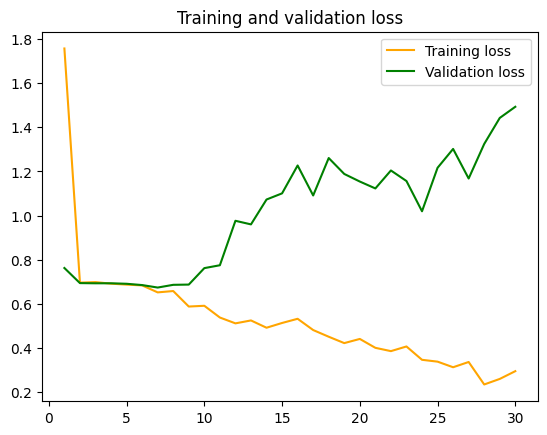

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc, label='Training accuracy', color="orange")
plt.plot(epochs, val_acc, label='Validation accuracy', color="green")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot loss
plt.plot(epochs, loss, label='Training loss', color="orange")
plt.plot(epochs, val_loss, label='Validation loss', color="green")
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mengevaluasi Model

In [ ]:
# Evaluasi model
loss, acc = model.evaluate(test_generator)
print(f'Akurasi data uji: {acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6792 - loss: 1.5589 
Akurasi data uji: 67.50%


### Menyimpan Model

In [ ]:
# Simpan model
model.save('cat_and_dog.h5')

### Menampilkan classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Reset test generator agar urut dari awal
test_generator.reset()

# Prediksi probabilitas
pred_prob = model.predict(test_generator)

# Ubah ke kelas 0 atau 1
y_pred = (pred_prob > 0.5).astype(int).reshape(-1)

#  Ambil label asli
y_true = test_generator.classes

# Mapping label kelas: biasanya Cat=0, Dog=1 (bisa dicek dari test_generator.class_indices)
target_names = list(test_generator.class_indices.keys())

# Tampilkan classification report
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step
              precision    recall  f1-score   support

         Cat       0.53      0.50      0.51        20
         Dog       0.52      0.55      0.54        20

    accuracy                           0.53        40
   macro avg       0.53      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



### Menampilkan evaluasi dengan confusion matrix

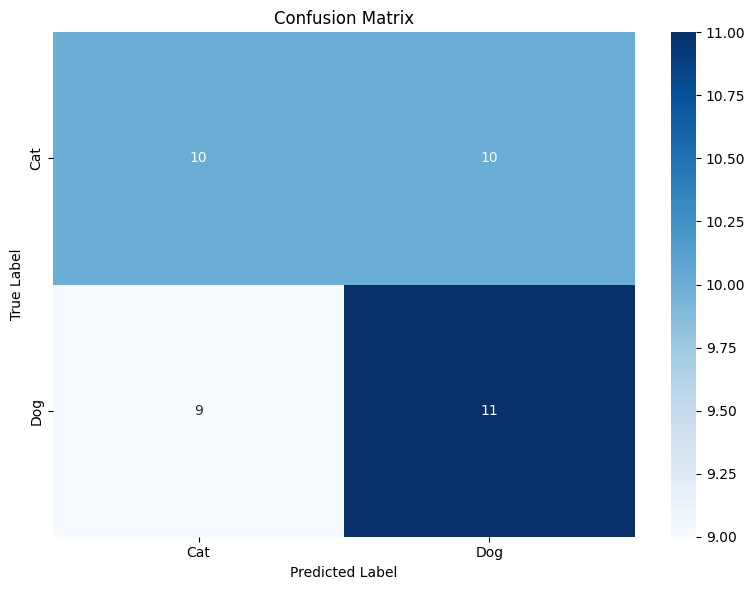

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Membuat Model Leraning dengan VGG16

### Load Library

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Membuat fungsi normalisasi data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke folder output_dataset
train_dir = 'cat_and_dog/train'
test_dir = 'cat_and_dog/test'

#buat ImageDataGenerator untuk augmentasi data latih dan normalisasi data uji
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalisasi pixel
    rotation_range=20,      # Augmentasi rotasi
    zoom_range=0.2,         # Zoom in/out
    horizontal_flip=True,   # Flip horizontal
)

test_datagen = ImageDataGenerator(rescale=1./255)   # hanya normalisasi

### Melakukan normalisasi data

In [ ]:
# Load gambar dari folder
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),   # Semua gambar diubah ukurannya
    batch_size=32,
    class_mode='binary'       # binary karena hanya 2 kelas: Cat dan Dog
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


### Memanggil Pre-trained model

In [ ]:
# Load VGG16 tanpa fully connected layer (include_top=false)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze semua layer awal (agar tidak dilatih ulang)
for layer in base_model.layers:
    layer.trainable = False

### Menambah layer klasifikasi

In [ ]:
# Tambahkan layer klasifikasi sendiri
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(1, activation='sigmoid')(x)

# Gabungkan jadi model akhir
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Melatih model

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 886ms/step - accuracy: 0.5126 - loss: 0.8805 - val_accuracy: 0.7250 - val_loss: 0.5960
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 646ms/step - accuracy: 0.6552 - loss: 0.6389 - val_accuracy: 0.7500 - val_loss: 0.5129
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 730ms/step - accuracy: 0.7877 - loss: 0.4639 - val_accuracy: 0.8000 - val_loss: 0.4588
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.8150 - loss: 0.4128 - val_accuracy: 0.8250 - val_loss: 0.4052
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 563ms/step - accuracy: 0.8865 - loss: 0.3629 - val_accuracy: 0.8000 - val_loss: 0.3722
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 576ms/step - accuracy: 0.8280 - loss: 0.3558 - val_accuracy: 0.8000 - val_loss: 0.3914
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 813ms/step - accuracy: 0.8717 - loss: 0.3362 - val_accuracy: 0.8750 - val_loss: 0.3374
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.8774 - loss: 0.2937 - val_accuracy: 0.8250 - val_loss:

### Menampilkan Curva Learning

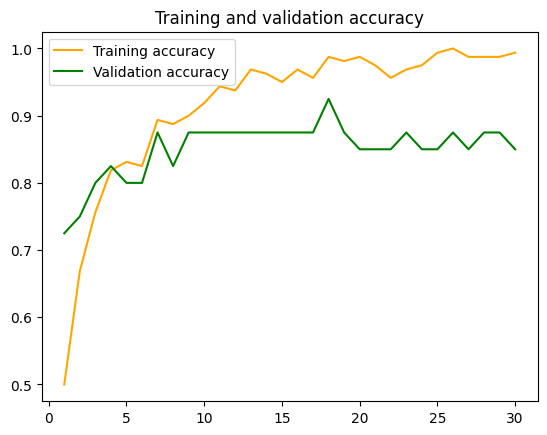

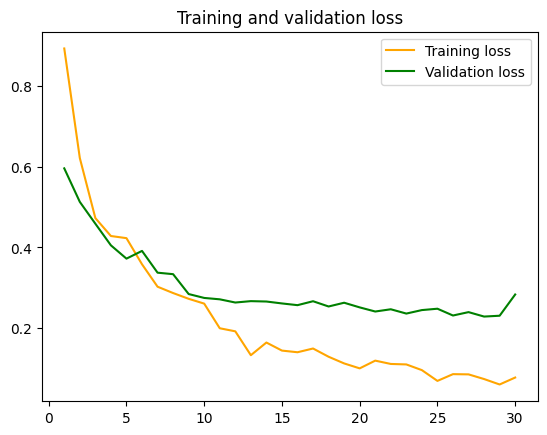

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc, label='Training accuracy', color="orange")
plt.plot(epochs, val_acc, label='Validation accuracy', color="green")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot loss
plt.plot(epochs, loss, label='Training loss', color="orange")
plt.plot(epochs, val_loss, label='Validation loss', color="green")
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mengevaluasi dan menyimpan model

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f'Akurasi VGG16 pada data uji: {acc*100:.2f}%')

model.save('vgg16_cat_dog_model.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8479 - loss: 0.2872


Akurasi VGG16 pada data uji: 85.00%


### Menampilkan classification report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Reset test generator agar urut dari awal
test_generator.reset()

# Prediksi probabilitas
pred_prob = model.predict(test_generator)

# Ubah ke kelas 0 atau 1
y_pred = (pred_prob > 0.5).astype(int).reshape(-1)

#  Ambil label asli
y_true = test_generator.classes

# Mapping label kelas: biasanya Cat=0, Dog=1 (bisa dicek dari test_generator.class_indices)
target_names = list(test_generator.class_indices.keys())

# Tampilkan classification report
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
              precision    recall  f1-score   support

         Cat       0.46      0.55      0.50        20
         Dog       0.44      0.35      0.39        20

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.44        40
weighted avg       0.45      0.45      0.44        40



### Menampilkan evaluasi dengan confusion matrix

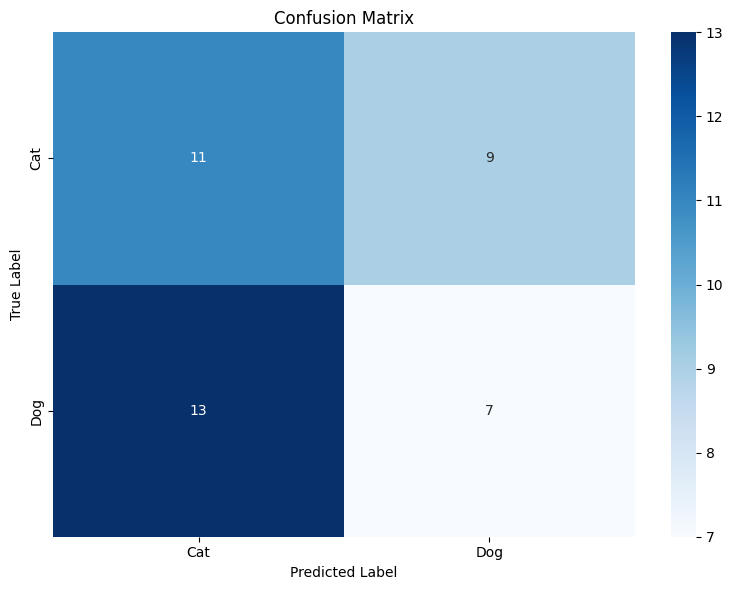

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Tugas Praktikum

## A. Lengkapi bagian coding VGG16 yang memiliki keterangan “gunakan code sebelumnya” dengan meniru data dari coding CNN

## B. Lakukan eksperimen ke 2 dengan data yang lebih besar

1.  Data diambil dari
https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
2.  Pilih 300 data latih dan 100 data test
3.  Lakukan split data dan ubah struktur folder seperi pada latihan praktikum ini
4.  Jika tidak bisa guka kaggle, ambil data di sini:
https://drive.google.com/drive/folders/1uBbS9w1Ab7sWmJMXEvyTVFil51yjWPAe

### Menggunakan CNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.chdir('/content/drive/MyDrive/Colab Notebooks/Tugas Modul 4/')
!pwd

/content/drive/MyDrive/Colab Notebooks/Tugas Modul 4


In [ ]:
import tensorflow as TF
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "train"
test_dir = "test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 166s 17s/step - accuracy: 0.5512 - loss: 1.0569 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.4963 - loss: 0.6946 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.5081 - loss: 0.6930 - val_accuracy: 0.5900 - val_loss: 0.6927
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.5241 - loss: 0.6929 - val_accuracy: 0.6000 - val_loss: 0.6928
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.5497 - loss: 0.6924 - val_accuracy: 0.4800 - val_loss: 0.6918
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.5093 - loss: 0.6930 - val_accuracy: 0.5700 - val_loss: 0.6938
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - accuracy: 0.6086 - loss: 0.6904 - val_accuracy: 0.5700 - val_loss: 0.6959
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step - accuracy: 0.5557 - loss: 0.6855 - val_accuracy: 0.

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 640x480 with 0 Axes>

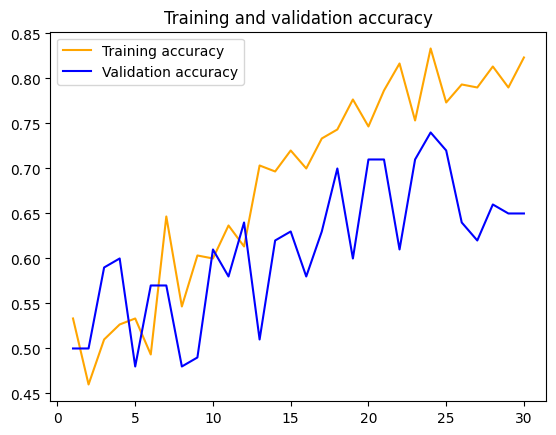

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label="Training accuracy", color="orange")
plt.plot(epochs, val_acc, label="Validation accuracy", color="blue")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

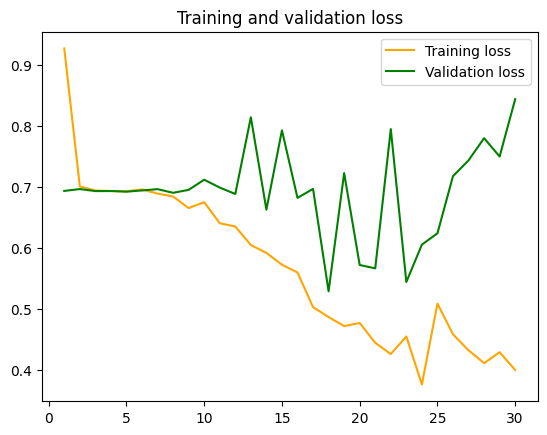

In [ ]:
plt.plot(epochs, loss, label="Training loss", color="orange")
plt.plot(epochs, val_loss, label="Validation loss", color="green")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Akurasi data uji: {acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6819 - loss: 0.6973 
Akurasi data uji: 65.00%


In [ ]:
model.save("model_cnn_cat_dog_tugas.h5")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

test_generator.reset()
pred_prob = model.predict(test_generator)
y_pred = (pred_prob > 0.5).astype(int).reshape(-1)

y_true = test_generator.classes
target_names = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
              precision    recall  f1-score   support

         Cat       0.46      0.54      0.50        50
         Dog       0.44      0.36      0.40        50

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.45      0.45      0.45       100



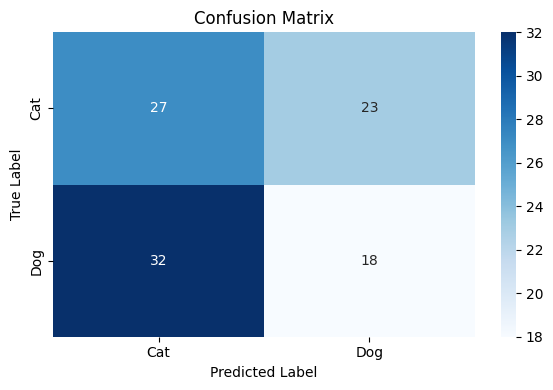

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=target_names,
           yticklabels=target_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### Menggunakan VGG16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1,activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
             loss="binary_crossentropy",
             metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5748 - loss: 0.7526 - val_accuracy: 0.6800 - val_loss: 0.5817
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.6928 - loss: 0.5523 - val_accuracy: 0.8000 - val_loss: 0.4673
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.8603 - loss: 0.3857 - val_accuracy: 0.8100 - val_loss: 0.4418
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.7981 - loss: 0.4230 - val_accuracy: 0.8300 - val_loss: 0.4019
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.8401 - loss: 0.3607 - val_accuracy: 0.8200 - val_loss: 0.4126
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.8154 - loss: 0.3741 - val_accuracy: 0.8400 - val_loss: 0.3778
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 416ms/step - accuracy: 0.9006 - loss: 0.2598 - val_accuracy: 0.8700 - val_loss: 0.3682
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.8943 - loss: 0.2634 - val_accuracy: 0.84

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<Figure size 640x480 with 0 Axes>

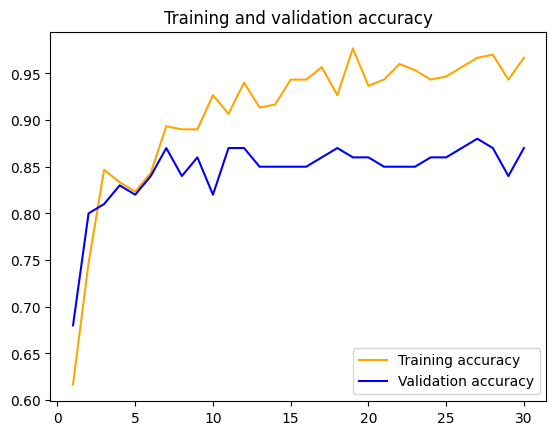

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label="Training accuracy", color="orange")
plt.plot(epochs, val_acc, label="Validation accuracy", color="blue")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

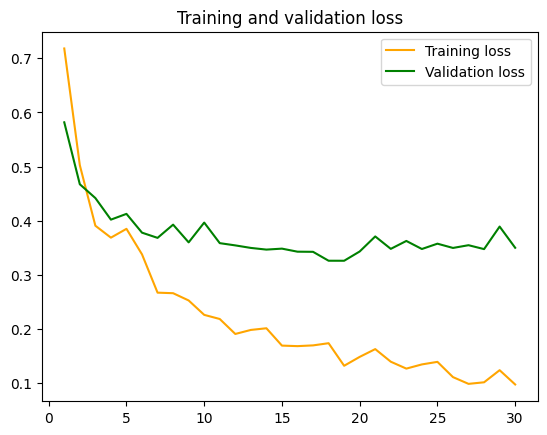

In [ ]:
plt.plot(epochs, loss, label="Training loss", color="orange")
plt.plot(epochs, val_loss, label="Validation loss", color="green")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Akurasi VGG16 pada data uji: {acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.8907 - loss: 0.3099 
Akurasi VGG16 pada data uji: 87.00%


In [ ]:
model.save("vgg16_cat_dog_model_tugas.h5")

## C. Buat laporan praktikum

* Hasil analisis latihan praktikum CNN dan VGG16
* Lengkapi literatur yang menjelaskan CNN dan VGG16
* Hasil analisis tugas eksperimen ke 2 dengan data yang lebih besar